In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib 

Using matplotlib backend: Qt5Agg


In [63]:
#loading dataset into Pandas DataFrame
df = pd.read_csv(r'C:\Users\kingk\Desktop\PCA_1_Test.csv', names = ['Year', 'Deaths', 'Population', 'Crude Death Rate', 'Age-adjusted Rate', 'State'])

df.head()

,Year,Deaths,Population,Crude Death Rate,Age-adjusted Rate,State
0,1999,169,4430143,3.8148,3.8521,Alabama
1,2000,197,4447100,4.4299,4.4857,Alabama
2,2001,216,4467634,4.8348,4.8915,Alabama
3,2002,211,4480089,4.7097,4.7619,Alabama
4,2003,197,4503491,4.3744,4.4333,Alabama


In [64]:
features = ['Year', 'Deaths', 'Population', 'Crude Death Rate', 'Age-adjusted Rate']
x = df.loc[:, features].values
y = df.loc[:, ['State']].values

In [65]:
x = StandardScaler().fit_transform(x)

In [66]:
pd.DataFrame(data = x, columns = features).head()

,Year,Deaths,Population,Crude Death Rate,Age-adjusted Rate
0,-1.638356,-0.820896,0.270262,-2.116640,-2.118273
1,-1.445608,-0.748750,0.277615,-1.969141,-1.967061
2,-1.252861,-0.699794,0.286518,-1.872048,-1.870214
3,-1.060113,-0.712677,0.291919,-1.902047,-1.901144
4,-0.867365,-0.748750,0.302066,-1.982450,-1.979567


In [83]:
pca = PCA(n_components = 2)

In [84]:
principalComponents = pca.fit_transform(x)

In [85]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [86]:
principalDf.head()

,principal component 1,principal component 2
0,-3.231894,-1.373677
1,-2.955605,-1.283132
2,-2.743254,-1.210723
3,-2.690584,-1.174670
4,-2.697449,-1.157388


In [87]:
df[['State']].head()

,State
0,Alabama
1,Alabama
2,Alabama
3,Alabama
4,Alabama


In [88]:
finalDf = pd.concat([principalDf, df[['State']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,State
0,-3.231894,-1.373677,Alabama
1,-2.955605,-1.283132,Alabama
2,-2.743254,-1.210723,Alabama
3,-2.690584,-1.174670,Alabama
4,-2.697449,-1.157388,Alabama


In [89]:
#VISUALIZING 2D PROJECTION

#Using a PCA projection to 2D to visualize the entire data set.

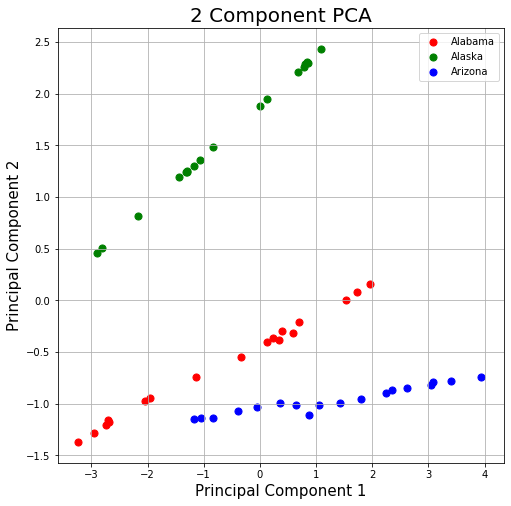

In [90]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Alabama', 'Alaska', 'Arizona']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['State'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], 
                                c = color, s = 50)
ax.legend(targets)
ax.grid()
                                